# Image Classification using CNN (Convolutional Neural Networks)

In [1]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [2]:
xtrain[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
ytrain[0:2]

array([5, 0], dtype=uint8)

### Visualize the training data

In [6]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

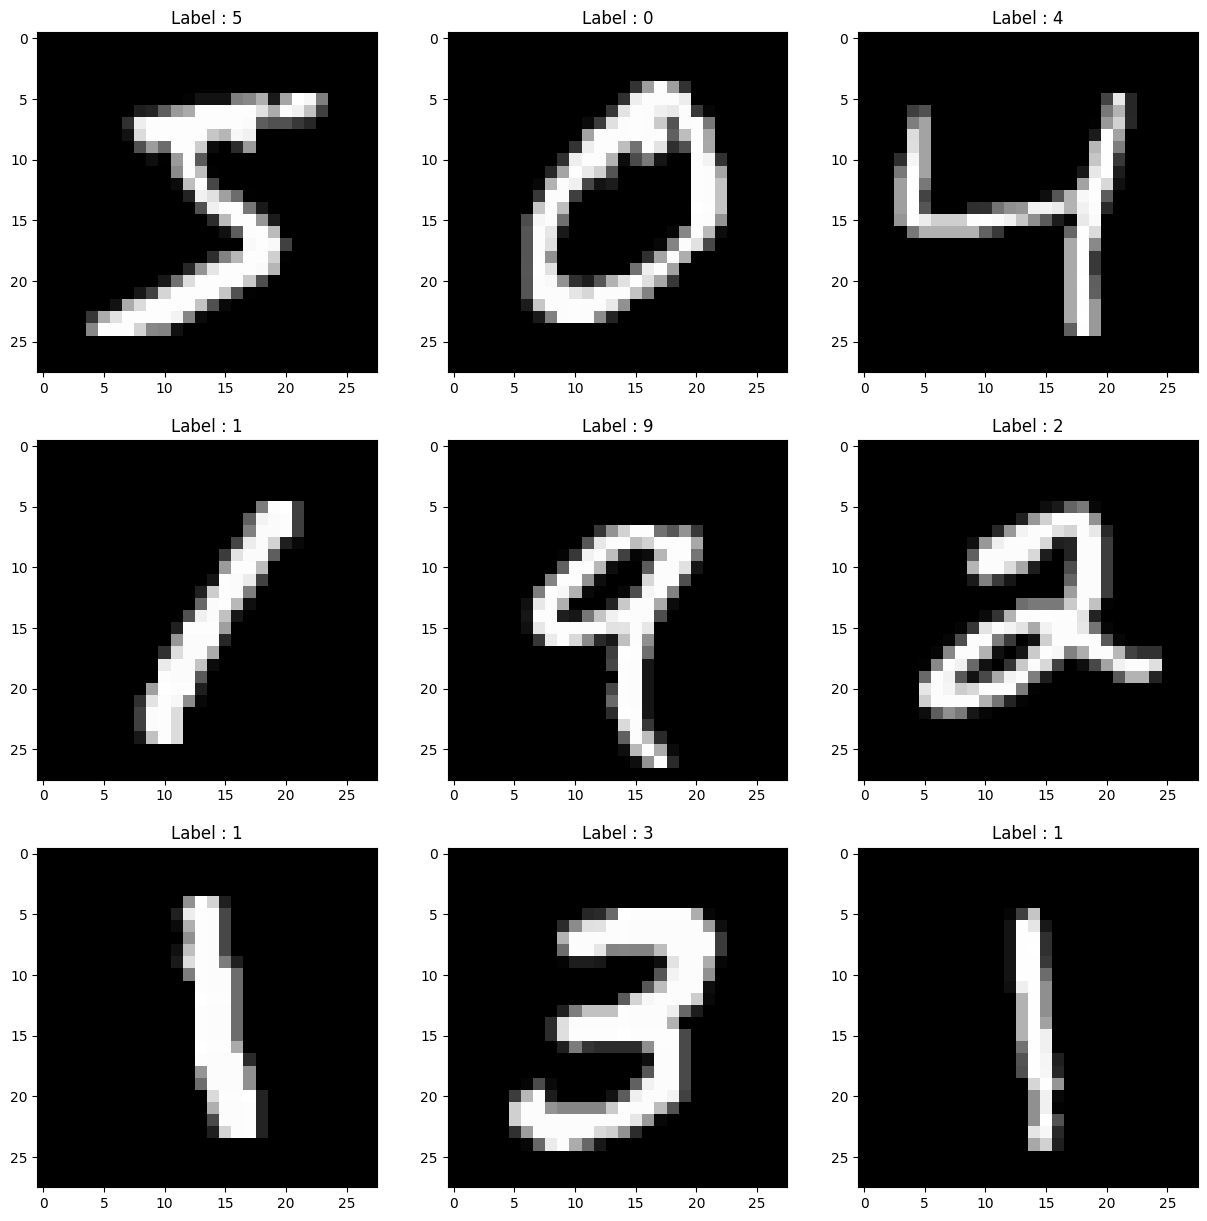

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'Label : {ytrain[i]}')
plt.show()

<Axes: >

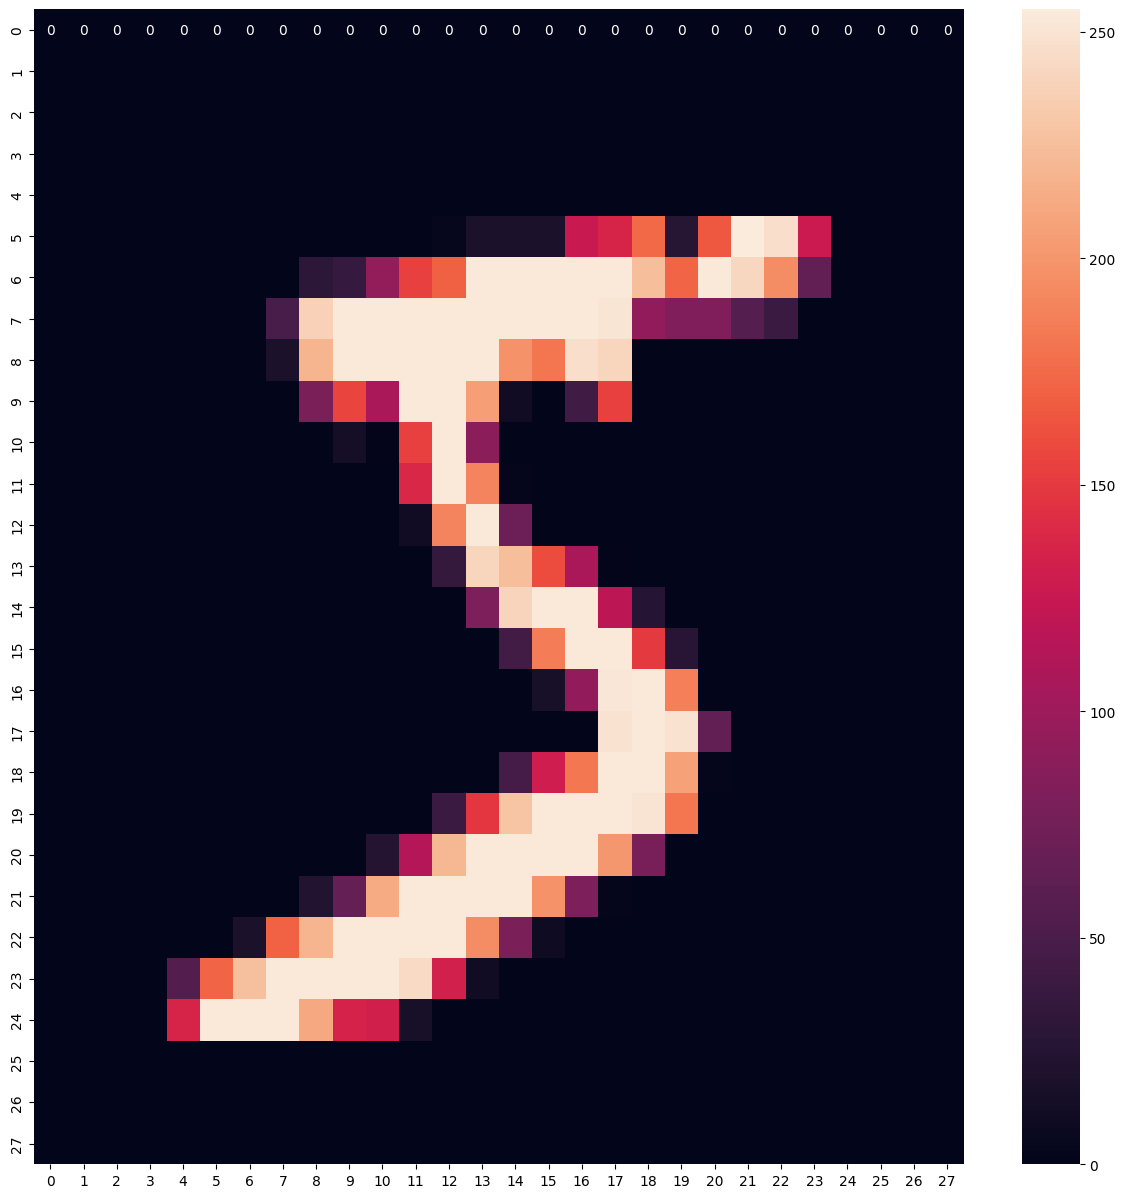

In [8]:
# Seaborn for visualizing digits
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')

## Image Preprocessing

In [9]:
# Scaling
xtrain_scl = xtrain/255
xtest_scl = xtest/255

### One Hot Encode ytrain, ytest as classification is multiclass

In [10]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [11]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
ytest_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Building the CNN Neural Network

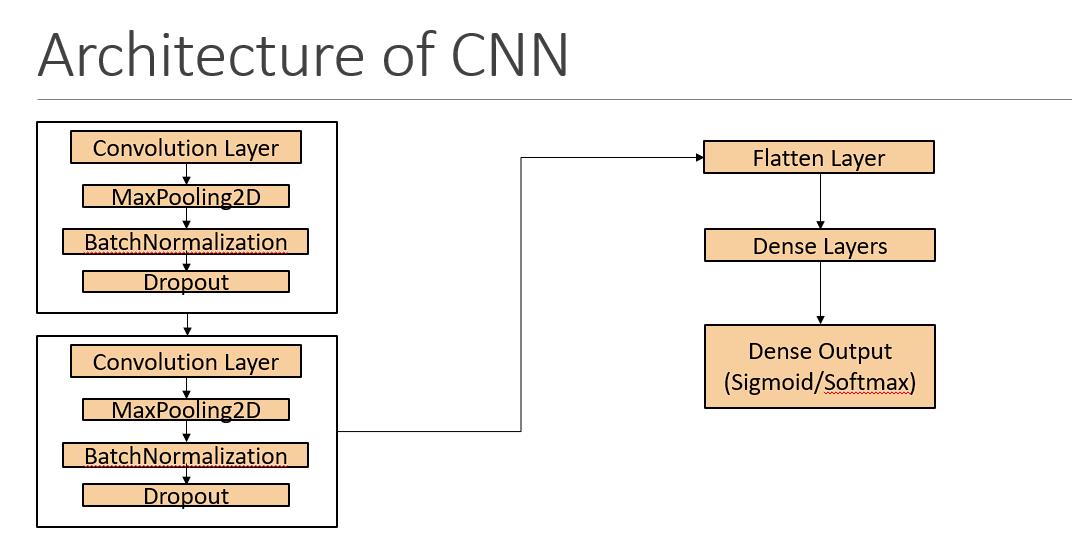

In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

In [14]:
ytrain_cat.shape[1]

10

In [15]:
# Initialize model
model = Sequential()

# Convolutional Layer 1
model.add(Convolution2D(filters=16, kernel_size=(3,3), input_shape = (28,28,1)))
# Max Pooling Layer 1
model.add(MaxPooling2D(pool_size=(2,2)))
# Batch Normalization Layer 1
model.add(BatchNormalization())
# Dropout Layer 1
model.add(Dropout(0.1))

# Convolution Layer 2
model.add(Convolution2D(filters=16, kernel_size=(3,3)))
# Max Pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
# Batch Normalization Layer 2
model.add(BatchNormalization())
# Dropou Layer 
model.add(Dropout(0.1))

# Flatten Layer
model.add(Flatten())

# Dense Layers
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Fit the model and store the history
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 45s 25ms/step - loss: 0.1696 - accuracy: 0.9470 - val_loss: 0.0654 - val_accuracy: 0.9797
Epoch 2/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0635 - val_accuracy: 0.9813
Epoch 3/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0595 - val_accuracy: 0.9822
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0410 - accuracy: 0.9865 - val_loss: 0.0503 - val_accuracy: 0.9862
Epoch 5/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0508 - val_accuracy: 0.9859


## Plot the learning curve

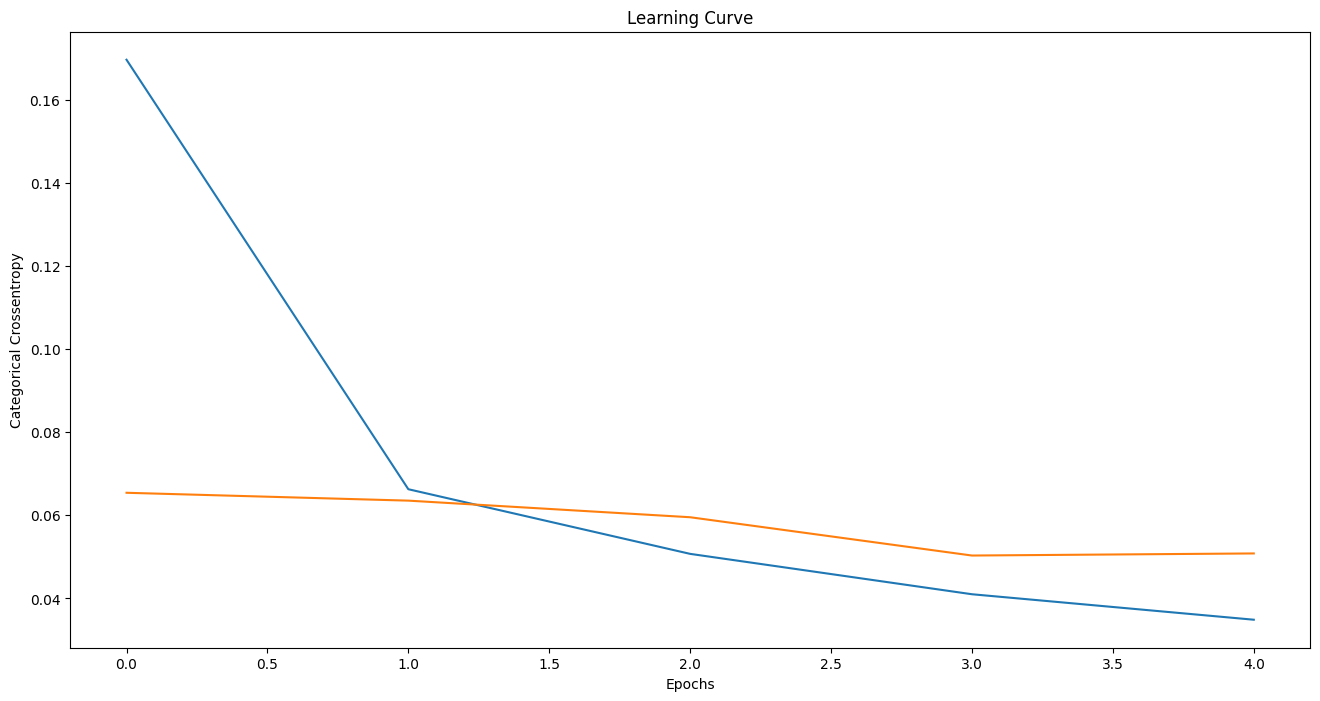

In [19]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

### Evaluate model on training and testing

In [20]:
# Training
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0251 - accuracy: 0.9923


[0.025146378204226494, 0.9923499822616577]

In [21]:
# Testing 
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 14s 8ms/step - loss: 0.0390 - accuracy: 0.9891


[0.038963209837675095, 0.9890999794006348]

## Predictions

In [22]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 3s 7ms/step


In [23]:
yprob_tr[0:5]

array([[1.0967872e-11, 1.2605041e-06, 1.0314280e-10, 2.5843498e-03,
        1.8920627e-11, 9.9741387e-01, 3.1457202e-07, 6.8410401e-08,
        1.4852967e-09, 2.5397325e-08],
       [1.0000000e+00, 2.0242395e-12, 7.1128547e-13, 8.5746072e-12,
        2.7267007e-14, 7.5006936e-15, 7.7481225e-12, 7.6007967e-12,
        2.6917910e-13, 3.9627057e-10],
       [1.8103850e-09, 1.2888696e-05, 1.7766142e-07, 2.2133092e-08,
        9.9998486e-01, 4.0473738e-10, 1.5161659e-09, 1.4563074e-06,
        2.2399576e-09, 4.1869075e-07],
       [5.6505652e-08, 9.9999964e-01, 6.6101941e-10, 7.1015364e-12,
        1.9239607e-08, 2.0283832e-11, 7.8943829e-09, 9.7762893e-08,
        8.0619216e-08, 1.9748139e-09],
       [1.2368201e-05, 8.5011516e-07, 1.0761015e-06, 4.5243287e-05,
        2.8751374e-04, 1.0931629e-05, 7.9547380e-07, 2.1968042e-05,
        9.5659768e-04, 9.9866271e-01]], dtype=float32)

In [24]:
import numpy as np
ypred_tr = np.argmax(yprob_tr,axis=-1)
ypred_ts = np.argmax(yprob_ts,axis=-1)

In [25]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [26]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [28]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plot Confusion Matrix

In [29]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

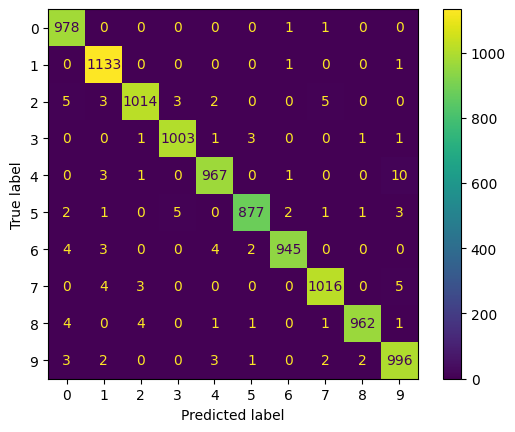

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=list(range(10)))
cfd.plot()

### Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the model for future use

In [32]:
model.save('Handwritten_model.keras')